# Exercise 1-1. Load the image dog.jpg and compute the full SVD. Choose a rank r < m and confirm that the matrix U∗U is the r × r identity matrix. Now con- firm that UU∗ is not the identity matrix. Compute the norm of the error between UU∗ and the n × n identity matrix as the rank r varies from 1 to n and plot the error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
plt.rcParams['figure.figsize'] = [16,8]

In [3]:
A = imread("/Users/bhaskarspc/Documents/Golden-Retriever-Husky-Mix-.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

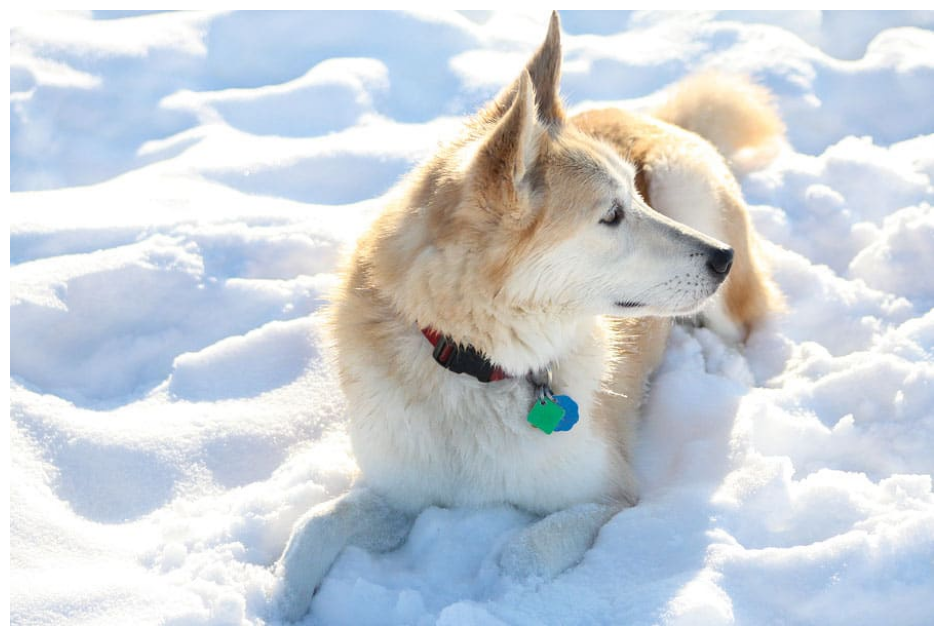

In [4]:
img0 = plt.imshow(A)
plt.axis('off')
plt.show

In [5]:
X = np.mean(A, -1)

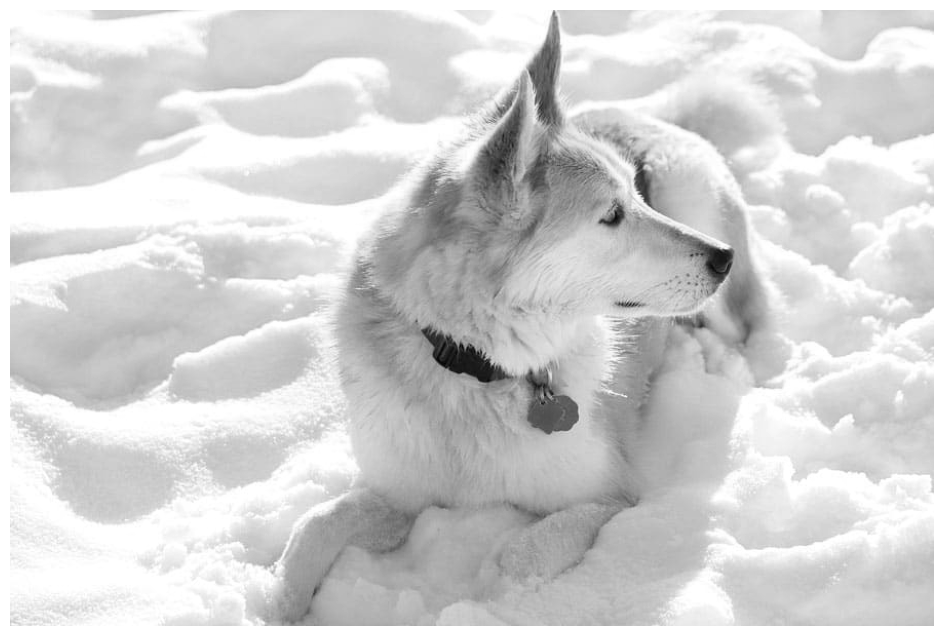

In [6]:
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [7]:
U, S, Vt = np.linalg.svd(X, full_matrices=True)
S = np.diag(S)

<function matplotlib.pyplot.show(close=None, block=None)>

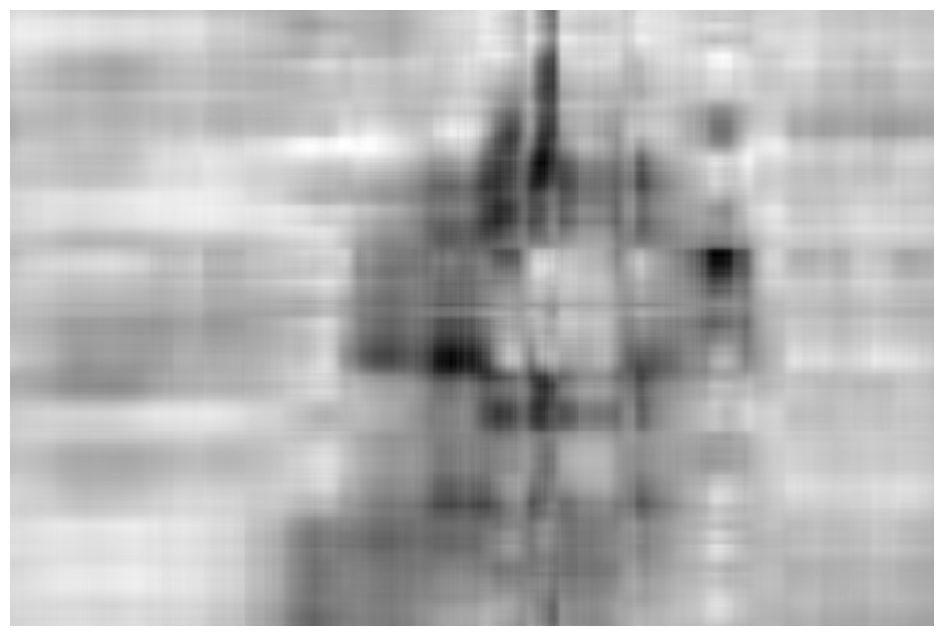

In [12]:
r=5
U_r = U[:, :r]
S_r = S[0:r, :r]
Vt_r = Vt[:r, :]

X_new = U_r @ S_r @ Vt_r
img_compressed = plt.imshow(X_new)
img_compressed.set_cmap('gray')
plt.axis('off')
plt.show

In [13]:
mat1 = U_r @ U_r.T
mat2 = U_r.T @ U_r
print(mat1.shape)
print(mat2.shape)

(600, 600)
(5, 5)


In [14]:
identity_r = np.eye(r)
print(identity_r.shape)
result = np.allclose(mat2, identity_r)
print(f"Is U^T*U the {r}x{r} identity matrix? {result}")

(5, 5)
Is U^T*U the 5x5 identity matrix? True


In [15]:
identity_n = np.eye(600)
result_2 = np.allclose(mat1, identity_n)
print(f"Is U*U^T the {600}x{600} identity matrix? {result_2}")

Is U*U^T the 600x600 identity matrix? False


In [16]:
n = 600
errors=[]
for i in range(1, n+1):
    identity_i = np.eye(i)
    error = np.linalg.norm(U[:, :i].T @ U[:, :i] - identity_i, 'fro')
    errors.append(error)

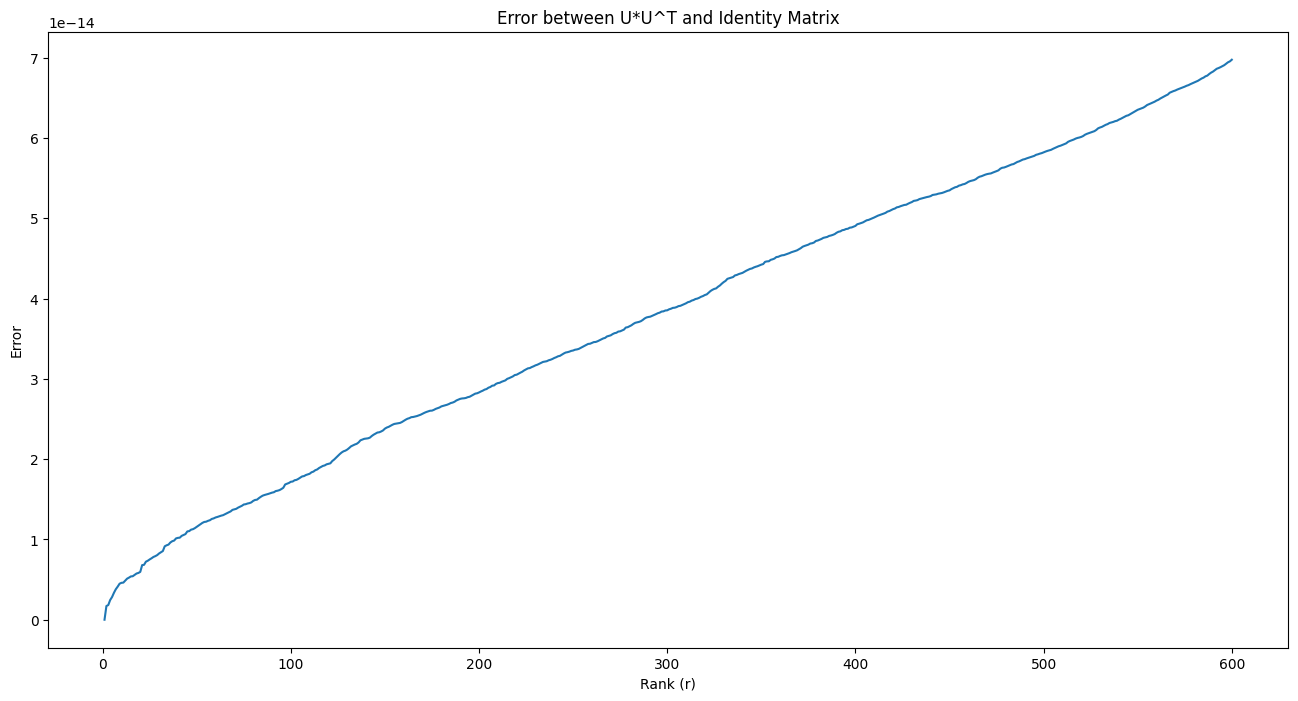

In [17]:
plt.plot(range(1, n + 1), errors)
plt.xlabel('Rank (r)')
plt.ylabel('Error')
plt.title('Error between U*U^T and Identity Matrix')
plt.show()